# The Data Analyse of The New York City Airbnb Open Data

## Yilin Wang

### Introduction:

This dataset is a collection of listing activity and metrics of the Airbnb in NYC, NY in 2019. With the development of economics, more and more people choose to use Airbnb as a traveling experience. Personally, Airbnb is one of the main aspects of my traveling because it is the best experienced from near the local culture, and it brings us sweet feeling like home. It al provide a more convenient, comfortable and economical method of travel.  The data file from public Kaggle Datasets shows all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions. 


###  Overall goal is to answer the following questions
###### Note: since the neighborhood contains too much information and it is easy to confuse readers so that I decide to use neighbourhood_group which is the exact location for analysis.

##### 1. Which are the top 10 neighbourhood_groups and neighbourhoods contians most airbnb? 
##### 2.  What is the relationship between the location/area (neighbourhood_group/neighbourhood) and the  Pageviews (overall reviews/ monthly reviews )? 
##### 3.  What is the relationship between the room style and price base on each location (neighbourhood_group)?


Since Airbnb is one of the main aspects of my traveling, the price and location are the most important elements that I considered as I search the Airbnb so that I am very interested in using my analyzing to answer this question based on the topic.

#### Data Description:

* id: listing ID
* name: name of the Aribnb listing
* host_id: ID of the host 
* host_name: name of the host
* neighbourhood_group: location 
* neighbourhood: area
* latitude: latitude coordinates
* longitude: longitude coordinates
* room_type: listing space type of the aribnb
* price: price in dollars
* minimum_nights: amount of nights minimum
* number_of_reviews: how many reviews of the airbnb
* last_review: latest review
* reviews_per_month: number of reviews per month
* calculated_host_listings_count: amount of listing per host
* availability_365: number of days when listing is available for booking

##### Note that:
Since this dataset "AB_NYC_2019" is a summary information and metrics for listings in New York City in 2019 so that it contain with the limitations of integrality because it only contain all information that post online during that time period (August, 12th, 2019).


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

sbn.set(font_scale = 1.5)
sbn.set_style('white')

%matplotlib inline

from scipy.stats import linregress, ttest_ind

In [7]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

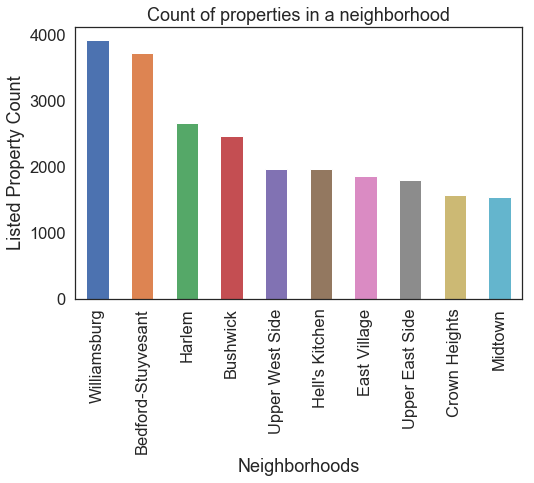

In [82]:
# count the properties value of neighborhood on the list  
list_neighborhood = data.neighbourhood.value_counts()
print(num_neighborhood)

# obtain the top ten neighborhood
top_10_neighborhoods = data.neighbourhood.value_counts().head(10)
print(top_10_neighborhoods)
#plotting the top ten neighborhoods
plt.figure(figsize=(8,5))
top_10_neighborhoods.plot.bar()
plt.xlabel('Neighborhoods')
plt.ylabel('Listed Property Count')
plt.title('Count of properties in a neighborhood')
plt.show() #optional


__What is the most popular Neighborhoods(contains more airbnb)?__

### Figure 1

__Williamsburg is the most popular Neighborhood.__ The pgraph shows the pupulation of airbnb in the listing of the Neighborhoods.

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


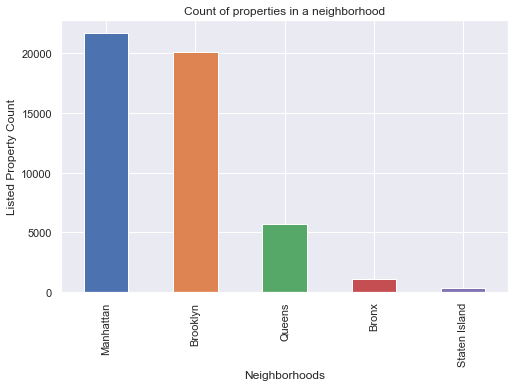

In [136]:
# count the properties value of neighbourhood_groups on the list  
list_neighbourhood_group = data.neighbourhood_group.value_counts()
print(list_neighbourhood_group)

# since there are only five neighbourhood_groups on the list, just print all groups
#plotting the neighbourhood_groups
plt.figure(figsize=(8,5))
list_neighbourhood_group.plot.bar()
plt.xlabel('Neighborhoods')
plt.ylabel('Listed Property Count')
plt.title('Count of properties in a neighborhood')
plt.show() #optional

__What is the most popular Neighborhoods_group/area(contains more airbnb)?__

### Figure 2

__Manhattan is the most popular Neighborhood group.__ The pgraph shows the pupulation of airbnb in the listing of the Neighborhoods group.

In [42]:
# obtain the overall information of the reviews_per_month
data.loc[:,'reviews_per_month'].describe()

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
25%          0.190000
50%          0.720000
75%          2.020000
max         58.500000
Name: reviews_per_month, dtype: float64

In [84]:
# 
pd.pivot_table(data,
               index = 'neighbourhood_group',
               values = 'reviews_per_month',
               aggfunc = ['mean', 'std'])

,mean,std
,reviews_per_month,reviews_per_month
neighbourhood_group,,
Bronx,1.837831,1.673284
Brooklyn,1.283212,1.516259
Manhattan,1.272131,1.628252
Queens,1.941200,2.213108
Staten Island,1.872580,1.685495


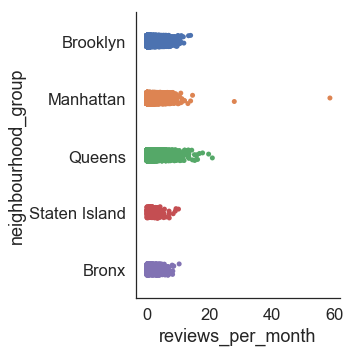

In [119]:
sbn.catplot(data = data,
            x = 'reviews_per_month',
            y = 'neighbourhood_group',
            kind = 'strip')

__Which Neighborhood group contains more reviews per month?__

### Figure 3

__Queens contains more reviews per month.__ The pgraph shows reviews in each month in the listing of the Neighborhoods. Based on the figure, it shows Queens conatins the most reviews per month. 

In [ ]:
# obtain the table about the relationship between neighbourhood and number_of_reviews
pd.pivot_table(data,
               index = 'neighbourhood',
               values = 'number_of_reviews',
               aggfunc = ['mean', 'std'])

In [105]:
# obtain the overall information of the number_of_reviews
data.loc[:,'number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

In [139]:
# obtain the max of reviews, and find its correspondent neighbourhood and neighbourhood group 
maxnumber_of_reviews = data['number_of_reviews'] == 629
area = data.loc[maxnumber_of_reviews, 'neighbourhood']
location = data.loc[maxnumber_of_reviews, 'neighbourhood_group']
print ('The neighbourhood contains most of reviews is {}.'. format(area))
print ('The neighbourhood group contains most of reviews per month is {}.'. format(location))

The neighbourhood contains most of reviews is 11759    Jamaica
Name: neighbourhood, dtype: object.
The neighbourhood group contains most of reviews per month is 11759    Queens
Name: neighbourhood_group, dtype: object.


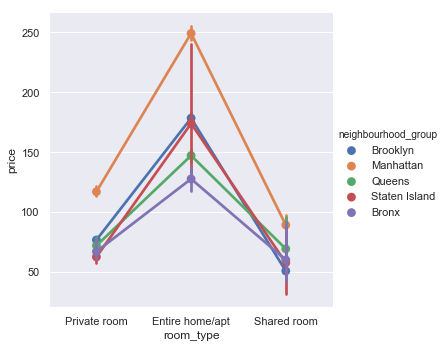

In [135]:
# creat a catplot that shows the relationship between the price and room style base on 
#---each neighbourhood_group
sbn.catplot(data = data,
            hue = 'neighbourhood_group',
            y = 'price',
            x = 'room_type',
            kind = 'point')

__Which room_style is more expensive, and where it locate (Neighborhood group)?__

### Figure 4

__The entire home is the most expensive room style with the location in Manhattan__ The plot shows relationship between the the price and room style base on each neighbourhood_group. Based on the figure, it shows the entire home which is located in Manhattan is most expensive which is make sence because it is the most dwelling location in NY. 

/Users/Genie/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/Genie/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


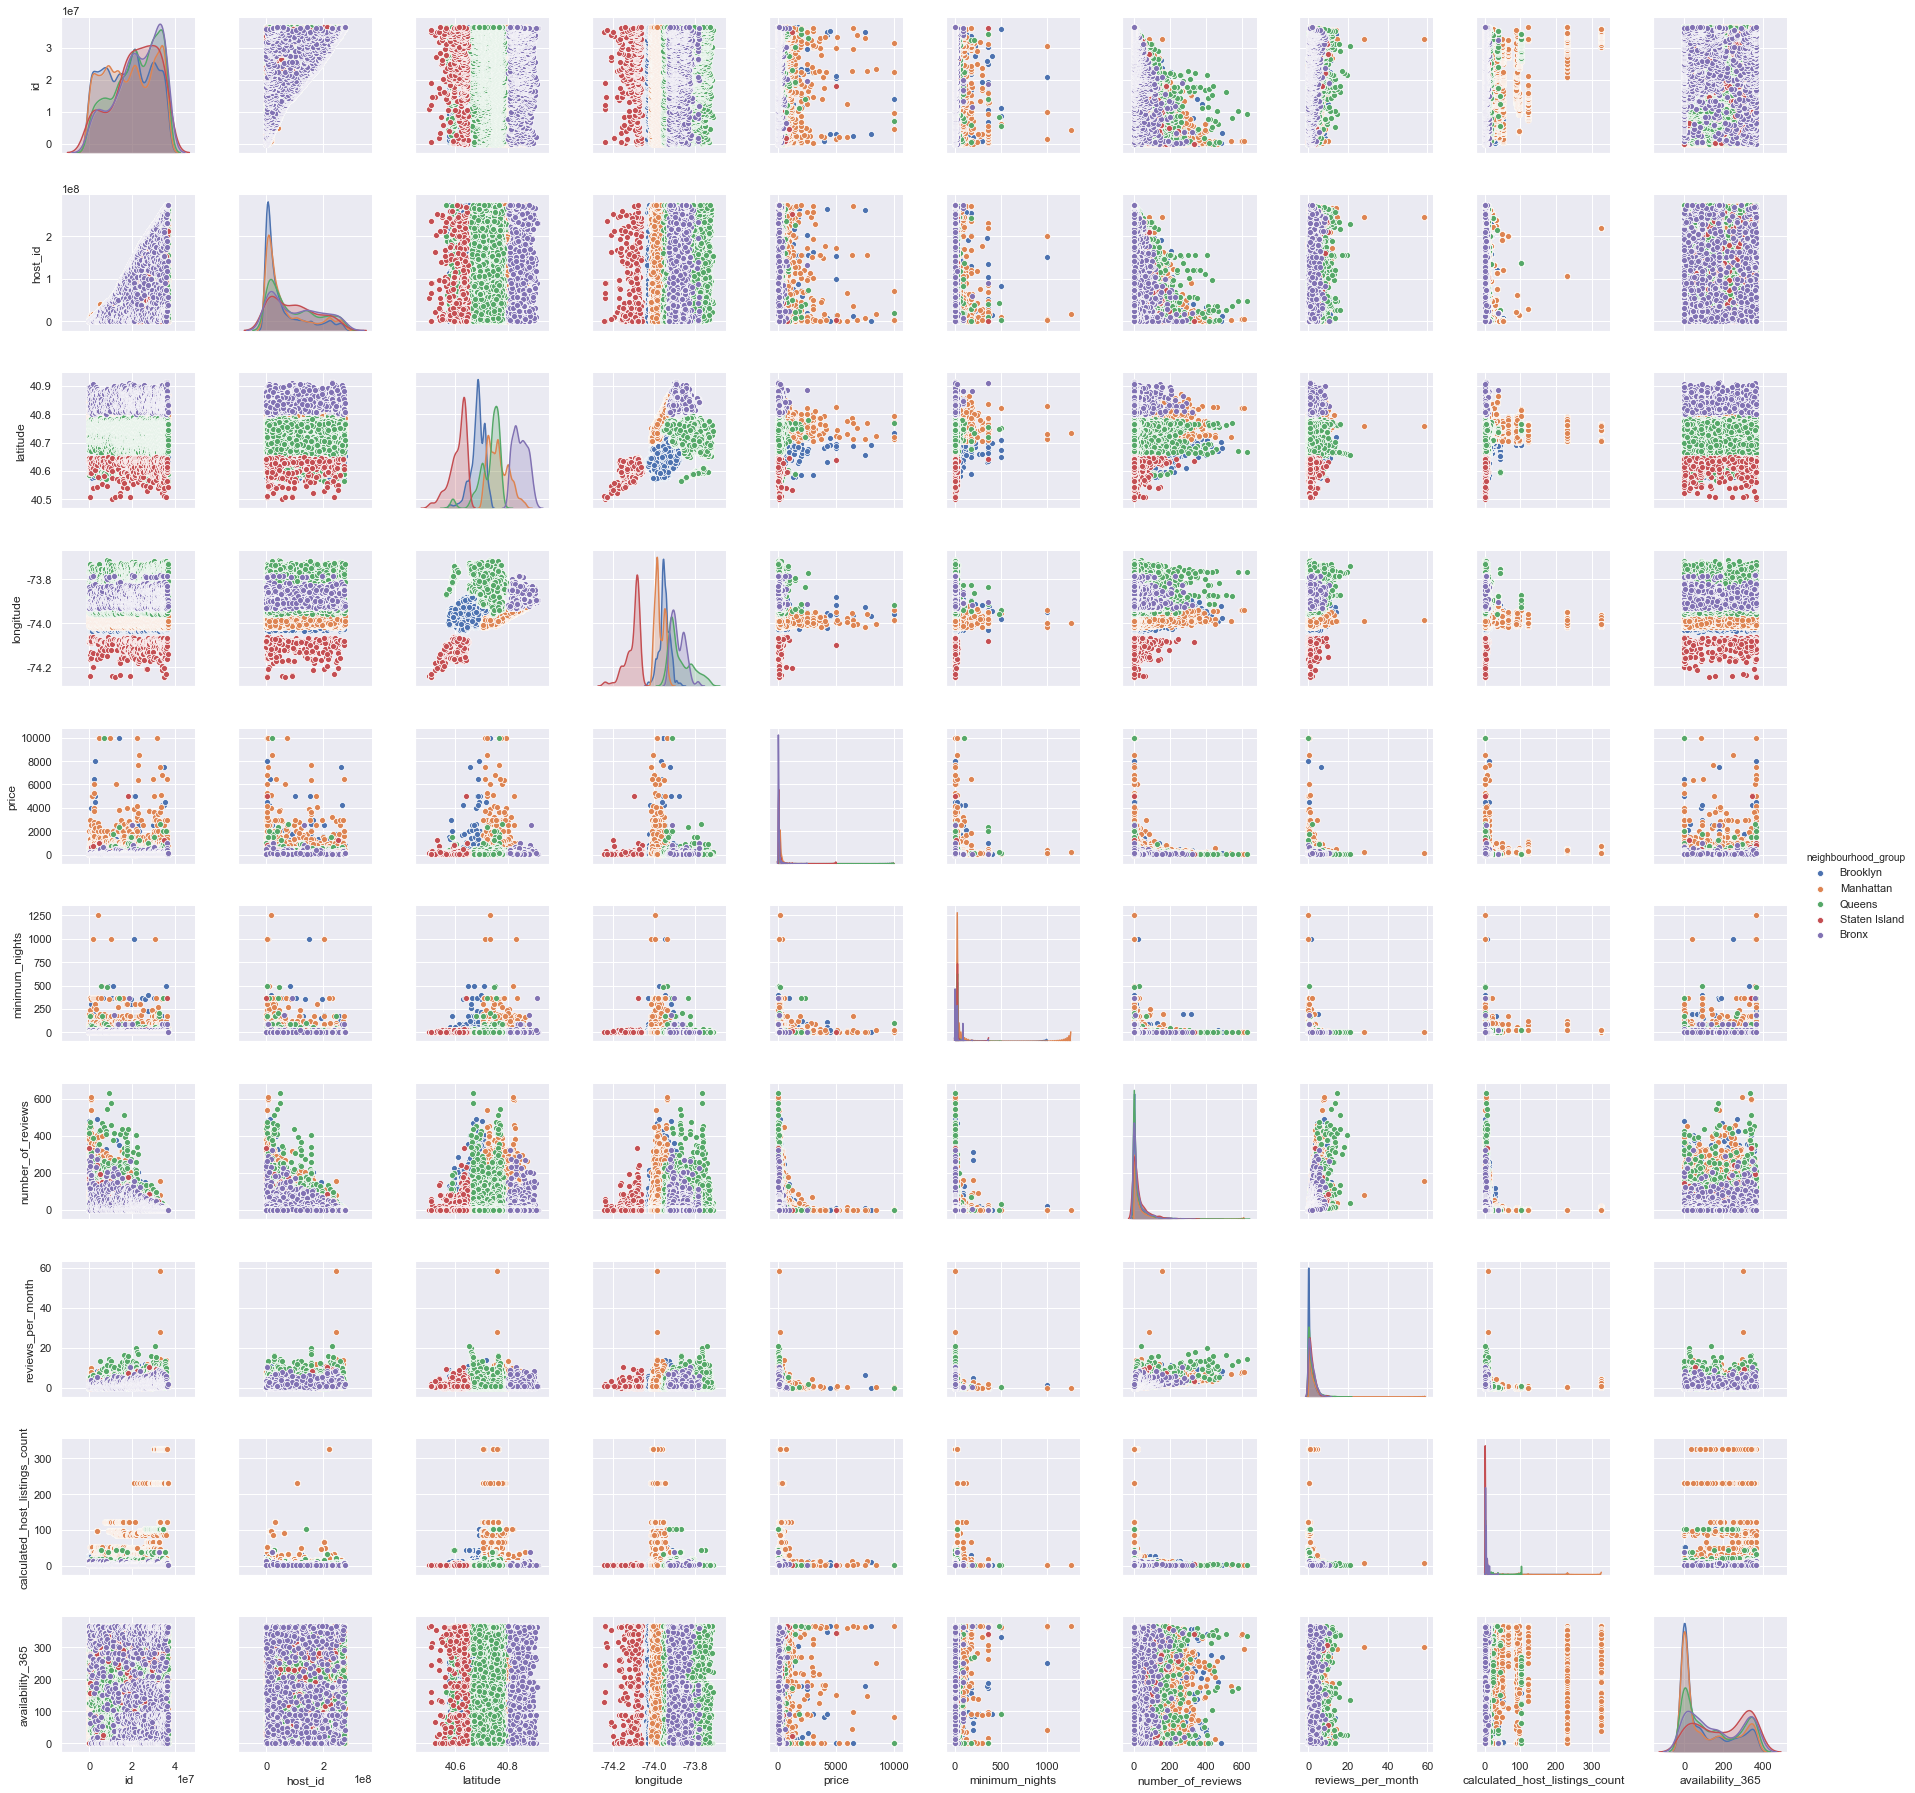

In [133]:
# creat a catplot that shows the relationship between each elemnt in the list base on  
#---each neighbourhood_group
sbn.pairplot(data, hue = 'neighbourhood_group')


### Figure 5

__The plot shows the relations between each element based on neighbourhood_group so that the user can base on their unique requirement to find the figure for searching the information.__  